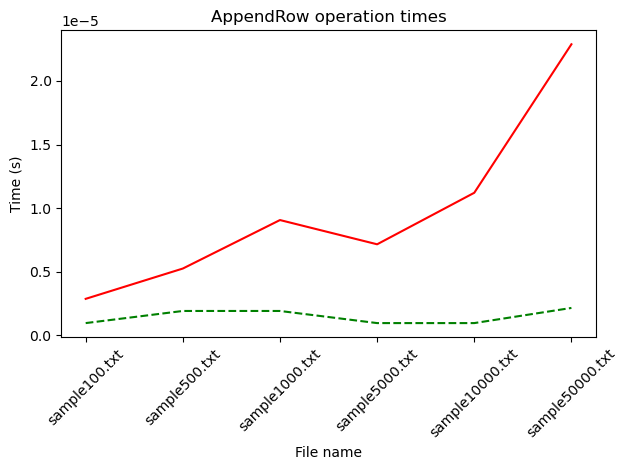

In [15]:
import time
import matplotlib.pyplot as plt
from spreadsheet.arraySpreadsheet import ArraySpreadsheet
from spreadsheet.linkedlistSpreadsheet import LinkedListSpreadsheet

from spreadsheet.cell import Cell
files = ['sample100.txt','sample500.txt','sample1000.txt','sample5000.txt','sample10000.txt','sample50000.txt']
timesArray = []
timesLinked = []
for file in files:

    spreadsheetArray = ArraySpreadsheet()
    spreadsheetLinked = LinkedListSpreadsheet()
    with open(file, 'r') as f:
        cellsFromFiles = []
        for line in f:
            values = line.split()
            currRow = int(values[0])
            currCol = int(values[1])
            currVal = float(values[2])
            currCell = Cell(currRow, currCol, currVal)
            # each line contains a cell
            cellsFromFiles.append(currCell)
        f.close()
        # construct the spreadsheet from the read in data
        spreadsheetArray.buildSpreadsheet(cellsFromFiles)
        spreadsheetLinked.buildSpreadsheet(cellsFromFiles)


        time1 = time.time()
        spreadsheetArray.appendRow()
        time2 = time.time()
        timesArray.append(time2 - time1)
        spreadsheetLinked.appendRow()
        time3 = time.time()
        timesLinked.append(time3 - time2)
    

plt.plot(files, timesArray, 'r-', label='array')
plt.plot(files, timesLinked, 'g--', label='linked')
plt.title("AppendRow operation times")
plt.xlabel("File name")
plt.ylabel("Time (s)")
# 调整标签旋转角度
plt.xticks(rotation=45)
# 自动调整子图布局
plt.tight_layout()
plt.show()
